## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

Preprocessing/Analyzing the data

In [1]:
# Start solution here
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree

# load the data
data = pd.read_csv('Default_Fin.csv')
display(data.head())

# find out information about the index dtype, columns, non-nul values
data.info()

# find the number of columns and rows
data.shape

# Remove columns that are not going to be used
data_updated = data.drop(['Index'], axis=1)
print(data_updated)

# Check for missing columns
print(data_updated.isnull().sum())

data_updated.shape

data.describe()


,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB
      Employed  Bank Balance  Annual Salary  Defaulted?
0            1       8754.36      532339.56           0
1            0       9806.16      145273.56           0
2            1      12882.60      381205.68           0
3            1       6351.00      428453.88           0
4            1       9427.92      461562.00           0
...        ...           ...            ...         ...
9995         1       8538.72      635908.56           0
9996         1       9095.52      235928.64           0
9997         1      10144.92 

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


Distribution of Target Variable

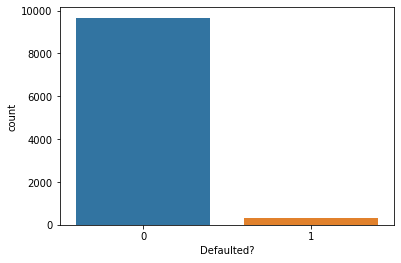

In [2]:
sns.countplot(x='Defaulted?', data=data_updated)

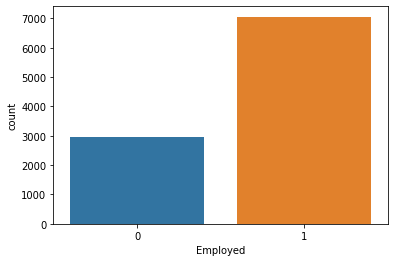

In [3]:
# graph showing employees

sns.countplot(x='Employed', data=data_updated)

Split the data into training and testing and create dummy variables




In [4]:
# Converting all categorical variables into dummy variables


X = data_updated.iloc[:, 0:3]
y = data_updated.iloc[:, 3]
print(X)
print(y)

print(data_updated.shape)
print(y.shape)
print(X.shape)

# separate the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)



      Employed  Bank Balance  Annual Salary
0            1       8754.36      532339.56
1            0       9806.16      145273.56
2            1      12882.60      381205.68
3            1       6351.00      428453.88
4            1       9427.92      461562.00
...        ...           ...            ...
9995         1       8538.72      635908.56
9996         1       9095.52      235928.64
9997         1      10144.92      703633.92
9998         1      18828.12      440029.32
9999         0       2411.04      202355.40

[10000 rows x 3 columns]
0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Defaulted?, Length: 10000, dtype: int64
(10000, 4)
(10000,)
(10000, 3)


Classification Model

[[2856   44]
 [  56   44]]


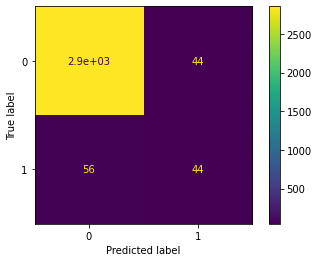

0.9782857142857143
0.9666666666666667
feature importance: [0.         0.94555436 0.05444564]
              0         1
1  Bank Balance  0.945554


In [5]:
# Fit the training data to a classification tree
DT = DecisionTreeClassifier(max_depth=6, criterion='entropy', random_state=2020)
DT.fit(X_train, y_train)

# visulaize the confusion matrix

y_pred = DT.predict(X_test)

matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)
metrics.plot_confusion_matrix(DT, X_test, y_test)
plt.show()

# Print the accuracy on the training partition
training_predict = DT.predict(X_train)
print(metrics.accuracy_score(training_predict, y_train))

# predicr rhe accuracy on the test partition
print(metrics.accuracy_score(y_pred, y_test))

# display the classification tree
#plt.figure(figsize=(12,12))
#fn = X.columns
#cn = y.unique()
#survivalTree = tree.plot_tree(DT, feature_names=fn, class_names=cn, filled=True)
#plt.show()

# Display the most important feeature in determining survival
print('feature importance:', DT.feature_importances_)
importance = pd.DataFrame(zip(X_train.columns, DT.feature_importances_))
print(importance.nlargest(1, columns=[1]))

Baseline Classification 

In [6]:
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train, y_train)
baseline_accuracy = dummy_classifier.score(X_test, y_test)
print(baseline_accuracy)

0.9666666666666667


Bagging Model

In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

bagging = DecisionTreeClassifier(random_state = 42)
bagging.fit(X_train, y_train)
pred_bagging = bagging.predict(X_test)
acc_bagging = accuracy_score(y_test, pred_bagging)

print('Accuracy score = ', acc_bagging)

Accuracy score =  0.9623333333333334


Bagging Model with Base Estimator = DecisionTreeClassifier to improve accuracy score

In [8]:
from sklearn.tree import DecisionTreeClassifier
base_est = DecisionTreeClassifier(max_depth=4)
m_bagging = BaggingClassifier(base_est, random_state=42, n_estimators=10)
m_bagging.fit(X_train, y_train)
p_bagging = m_bagging.predict(X_test)
accuracy_bagging = accuracy_score(y_test, p_bagging)
print(accuracy_bagging)

0.971


Random Forest Model

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, recall_score, precision_score, accuracy_score)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestClassifier(n_estimators=100, max_features=3, random_state=42)
forest_model.fit(X_train, y_train)
randomForestPredict = forest_model.predict(X_test)
randomForestRecall = recall_score(y_test, randomForestPredict)
randomForestPrecision = precision_score(y_test, randomForestPredict)
randomForestAccuracy = accuracy_score(y_test, randomForestPredict)
print('Accuracy Score:' ,randomForestAccuracy)

# calculate the top feature
print('feature importance:', forest_model.feature_importances_)
importance = pd.DataFrame(zip(X_train.columns, DT.feature_importances_))
print(importance.nlargest(1, columns=[1]))


Accuracy Score: 0.9676666666666667
feature importance: [0.0141524  0.67633656 0.30951103]
              0         1
1  Bank Balance  0.945554


Boosting Model

In [10]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_est = DecisionTreeClassifier(max_depth = 4)
ada_boost = AdaBoostClassifier(base_est, n_estimators = 200, random_state = 42, learning_rate = 0.05)
ada_boost.fit(X_train, y_train)
predict_ada = ada_boost.predict(X_test)
res1 = round(recall_score(y_test, predict_ada), 4)
accuracy_ada = accuracy_score(y_test, predict_ada)
print(accuracy_ada)

# Most important feature
feature = ada_boost.feature_importances_
list_features = X_train.columns
frame = pd.DataFrame({'Features': list_features, 'importance': feature})
frame.nlargest(1, columns='importance')

0.9656666666666667


,Features,importance
1,Bank Balance,0.511875


Voting Classifier Model with RFC, DTC, SVM, and LR

In [11]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

rf_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
Dtree_classifier = DecisionTreeClassifier(max_depth=4)
svm_classifier = SVC(probability = True, random_state=0)
log_classifier = LogisticRegression(random_state=0)

classifier = VotingClassifier(estimators=[('rf', rf_classifier), ('Dt', Dtree_classifier), ('svm', svm_classifier), ('log', log_classifier)], voting = 'soft')

classifier.fit(X_train, y_train)
classifier_predict = classifier.predict(X_test)
recall_voting = recall_score(y_test, classifier_predict)
precision_voting = precision_score(y_test, classifier_predict)
accuracy = accuracy_score(y_test, classifier_predict)
print(accuracy)

0.9683333333333334


XGBoost

In [12]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

data_dmatrix = xgb.DMatrix(data=X, label=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

regression_xg = xgb.XGBRegressor(objective='reg:linear', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=100)

regression_xg.fit(X_train, y_train)
predict_xg = regression_xg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, predict_xg))
print('RMSE:', rmse)

from sklearn.linear_model import LinearRegression

linearRegModel = LinearRegression()
linearRegModel.fit(X_train, y_train)

predict_train = linearRegModel.predict(X_train)
rmseTrain = np.sqrt(mean_squared_error(y_train, predict_train))
print("Train RMSE: ", (rmseTrain))

predict_test = linearRegModel.predict(X_test)
rmseTest = np.sqrt(mean_squared_error(y_test, predict_test))
print("Test RMSE: ", (rmseTest))


[00:20:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.1426529945867478
Train RMSE:  0.16885927903375653
Test RMSE:  0.16415800342353137


Cross Validation using XGBoost

In [13]:
paramters = {"objective":"reg:linear", 'colsample_bytree':0.3, 'learning_rate': 0.1, 'max_depth': 5, 'alpha': 10}
cv = xgb.cv(dtrain=data_dmatrix, params=paramters, nfold=3, num_boost_round=50, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=123)
print(cv)

print((cv["test-rmse-mean"]).tail(1))

[00:20:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:20:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:20:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0          0.456889        0.000139        0.456892       0.000091
1          0.418714        0.000296        0.418718       0.000191
2          0.385015        0.000433        0.385006       0.000318
3          0.354490        0.000931        0.354557       0.001496
4          0.328440        0.000979        0.328511       0.001722
5          0.303904        0.002224        0.303979       0.002376
6          0.282423        0.003506        0.282544       0.003323
7          0.264475        0.004271        0.264628       0.004360
8          0.249

Visualization of feature importance 

[00:20:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


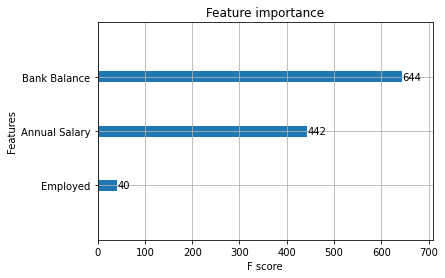

In [14]:
xgRegression = xgb.train(params=paramters, dtrain=data_dmatrix, num_boost_round=10)

import matplotlib.pyplot as plt

xgb.plot_importance(regression_xg)
plt.rcParams['figure.figsize'] = [50,10]
plt.show()


The best model was the Boostrap Aggregation Model with the Decision Tree Classifier as the base estimator. It was the best model becasue it had the best performance shown by it's high accuracy score

Text(0.5, 1.0, 'Accuracy Score of Each Model')

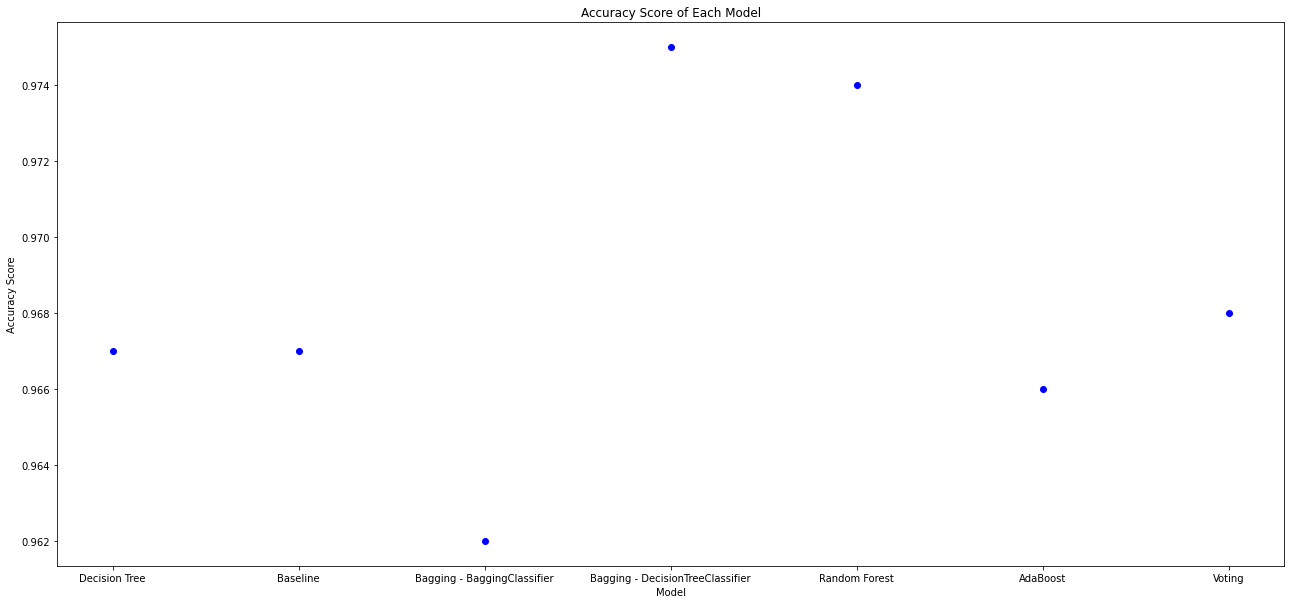

In [45]:
# plot all the accuracy scores
x=['Decision Tree', 'Baseline', 'Bagging - BaggingClassifier', 'Bagging - DecisionTreeClassifier', 'Random Forest', 'AdaBoost', 'Voting']
y = [0.967, 0.967, 0.962, 0.975, 0.974, 0.966, 0.968]

myFig = plt.figure(figsize = (22,10))
ax1 = myFig.add_subplot(1,1,1)
ax1.scatter(x, y, color='b' )

ax1.set_xlabel("Model")
ax1.set_ylabel('Accuracy Score')
ax1.set_title("Accuracy Score of Each Model")

Adjusting parameters of the best model 

```
# This is formatted as code
```



In [33]:
from sklearn.tree import DecisionTreeClassifier

# pruning hurts the accuracy score

base_est = DecisionTreeClassifier(max_depth=4)
m_bagging = BaggingClassifier(base_est, random_state=42, n_estimators=10)
m_bagging.fit(X_train, y_train)
p_bagging = m_bagging.predict(X_test)
accuracy_bagging = accuracy_score(y_test, p_bagging)
print(accuracy_bagging)

# Making max_depth higher decreases the accuracy score

base_est = DecisionTreeClassifier(max_depth=15)
m_bagging = BaggingClassifier(base_est, random_state=42, n_estimators=10)
m_bagging.fit(X_train, y_train)
p_bagging = m_bagging.predict(X_test)
accuracy_bagging = accuracy_score(y_test, p_bagging)
print(accuracy_bagging)

# adjust random_state also decreases the score

base_est = DecisionTreeClassifier(max_depth=6)
m_bagging = BaggingClassifier(base_est, random_state=60, n_estimators=20)
m_bagging.fit(X_train, y_train)
p_bagging = m_bagging.predict(X_test)
accuracy_bagging = accuracy_score(y_test, p_bagging)
print(accuracy_bagging)


0.9745
0.969
0.973
